# importing necessary libraries

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os
import statistics
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

## Analysis on Problem 1:

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.


In [528]:
data= pd.read_excel('Downloads/Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [529]:
# top 5 values
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [530]:
# last 5 values
data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [531]:
#shape of the data
data.shape

(1525, 10)

There are total 1525 rows and 10 Columns in the data.

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


we have multiple data types as 8 integer data types and 2 object data types.

Coulumn Unnamed: 0 contains serial number so we can remove it.

In [533]:
data.drop('Unnamed: 0', axis=1 ,inplace=True)

In [534]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [535]:
data.duplicated().sum()

8

8 duplicate entry found in the data and will remove these values.

In [536]:
data.drop_duplicates(inplace=True)

In [537]:
data.duplicated().sum()

0

All duplicate values are removed from data

In [538]:
data.shape

(1517, 9)

In [539]:
# checking for missing values
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

No Missing value present in the data.

In [540]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


There is no anomalies found in data.

variable 'Age' spread to wide range .

In [541]:
data.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

We can see that slight skewness present in the data that means data are moderately skewed.

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

## Data Visualization

### Univariate Analysis

#### Non visual representation

Using describe function to get descriptive  analysis.

In [542]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,NaN,NaN,NaN,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,NaN,NaN,NaN,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,NaN,NaN,NaN,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,NaN,NaN,NaN,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,NaN,NaN,NaN,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,NaN,NaN,NaN,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Insights:

Maximum age of voter is 93 and minimum age is 24 which shows that young population is also intreseted in election.

Party choice 'Labour' has maximum count which means people are more intrested in this party.

Maximum female voters involved  in voting .

#### Visual representation:

We will use Boxplot and histogram to see distribution and pattern of continuous varibales.

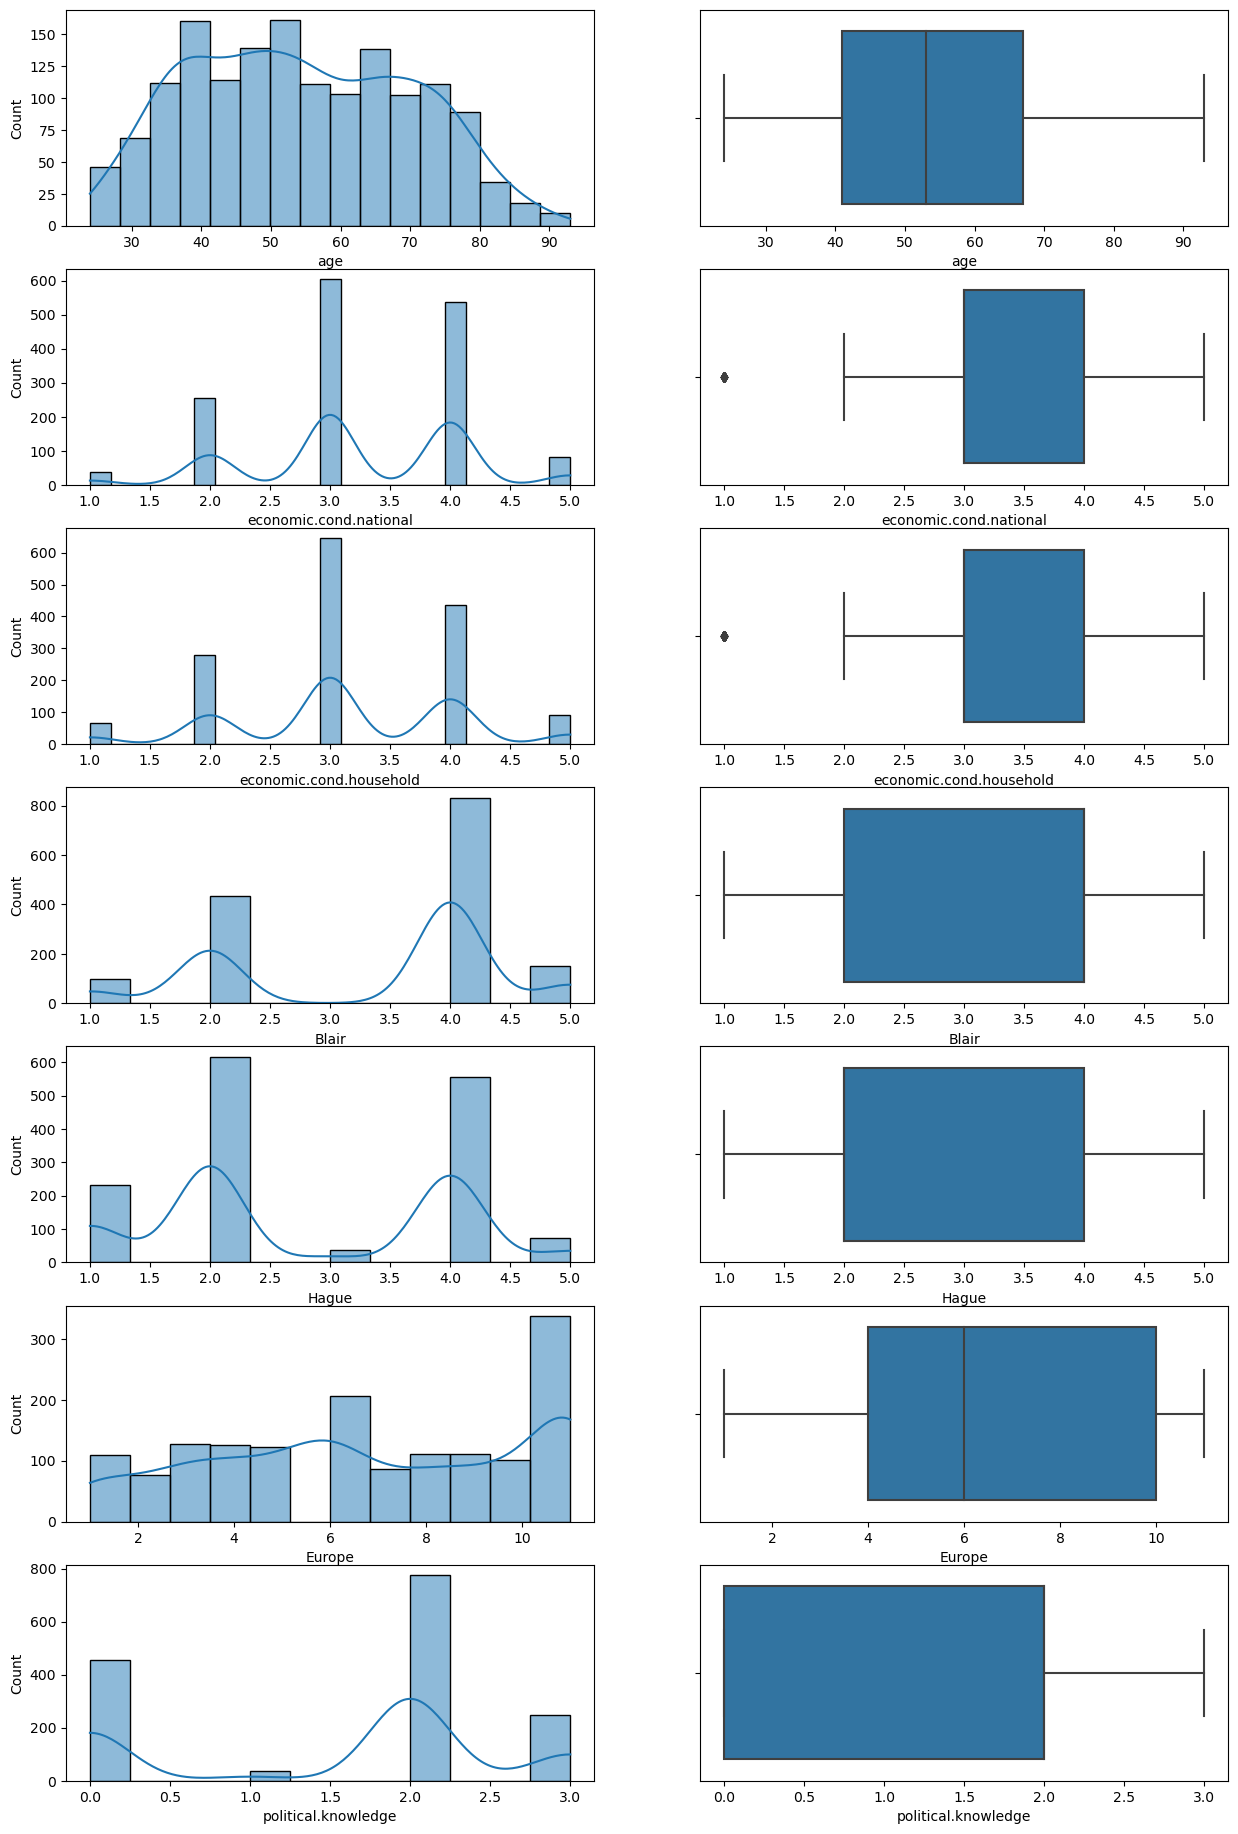

In [543]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,23)
sns.histplot(data['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=data, ax=axes[0][1])
sns.histplot(data['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=data , ax=axes[1][1])
sns.histplot(data['economic.cond.household'] , kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=data , ax=axes[2][1])
sns.histplot(data['Blair'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Blair', data=data , ax=axes[3][1])
sns.histplot(data['Hague'] , kde=True, ax=axes[4][0])
sns.boxplot(x='Hague', data=data , ax=axes[4][1])
sns.histplot(data['Europe'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Europe', data=data , ax=axes[5][1])
sns.histplot(data['political.knowledge'] , kde=True, ax=axes[6][0])
sns.boxplot(x='political.knowledge', data=data , ax=axes[6][1])
plt.show()

Insights:

From the above box plots we can say that there are ouliers present in the data.

For the variable 'political.knowledge' no lower whiskers shown in the boxplot which means that first quartile is equal to the lower whiskers.

#### For Categorical variable we are using barplot.

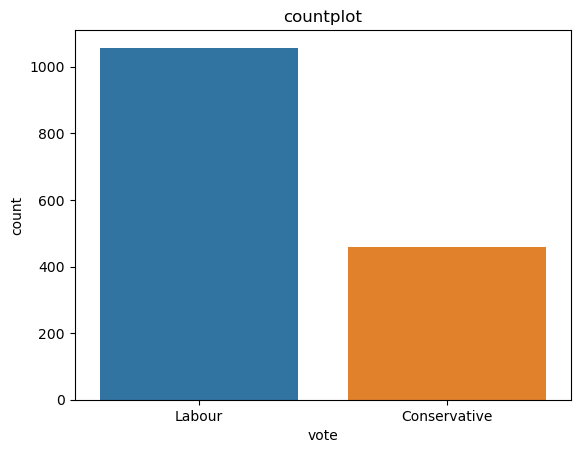

In [544]:
sns.countplot(x='vote', data=data)
plt.title('countplot');

As we have seen before that party 'Labour' is the choice of most of the voters and the difference in number of voters is quite high.

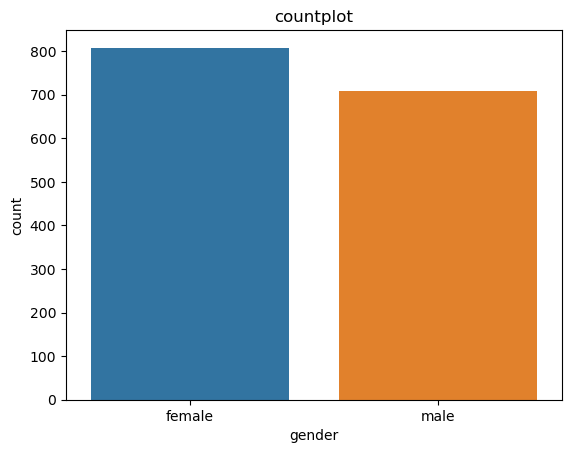

In [545]:
sns.countplot(x='gender', data=data)
plt.title('countplot');

We can see that mostly 'Female' voters are involved in elections.

### Bivariate Analysis 

We will use countplot & boxplot  to compare 2 variables .

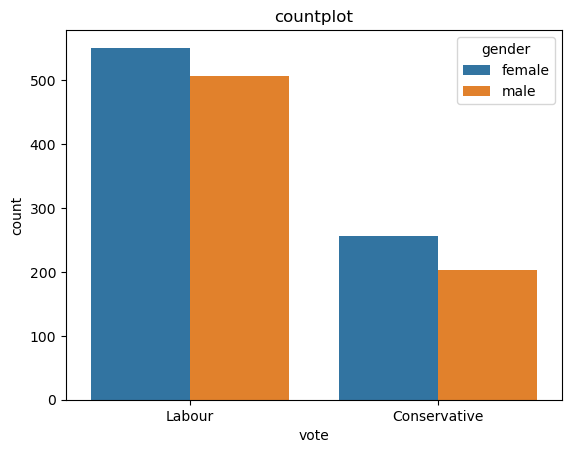

In [546]:
sns.countplot(data = data, x ='vote',hue ='gender')
plt.title('countplot');

we have seen earlier that party 'Labour' has maximum voters and female voters are more involved in elctions irrespective of any party.

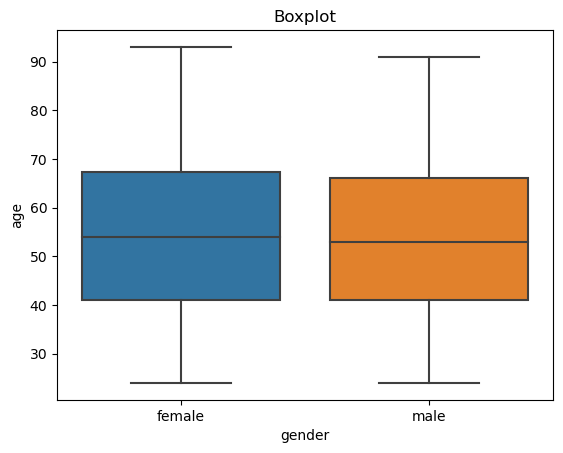

In [547]:
sns.boxplot(y='age', x='gender', data=data)
plt.title('Boxplot');

Both male and female voters age ratio is almost similar .

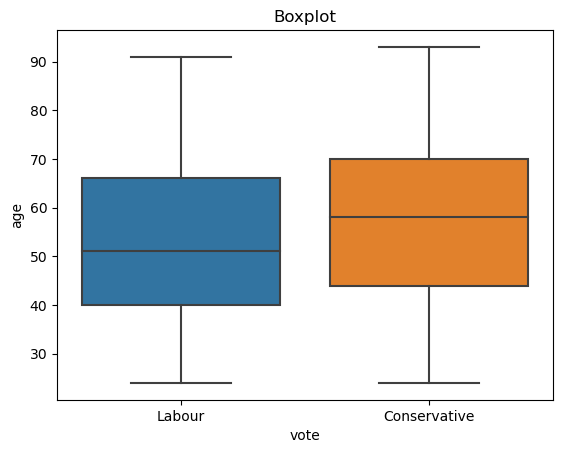

In [548]:
sns.boxplot(data=data, x='vote', y='age')
plt.title('Boxplot');

We can see that in 'conservative' party 50 or less than 50% of voters belongs to age 60 which is higher comapare to other party 'Labour' that means young voters are more intrested in Party 'Labour'.

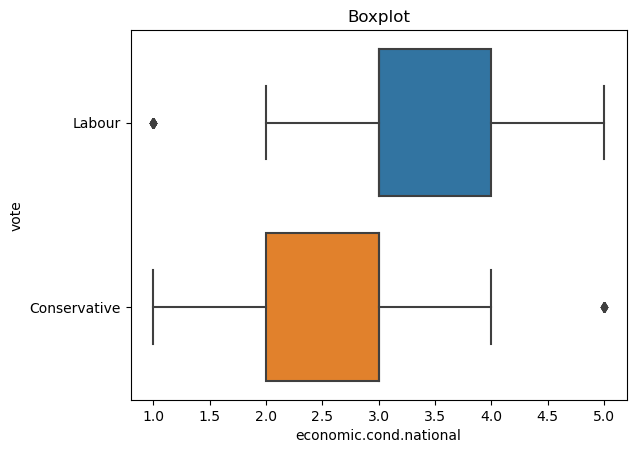

In [549]:
sns.boxplot(data=data, x='economic.cond.national', y='vote')
plt.title('Boxplot');

Those who have good economic condition are intrested in party 'Labour'.

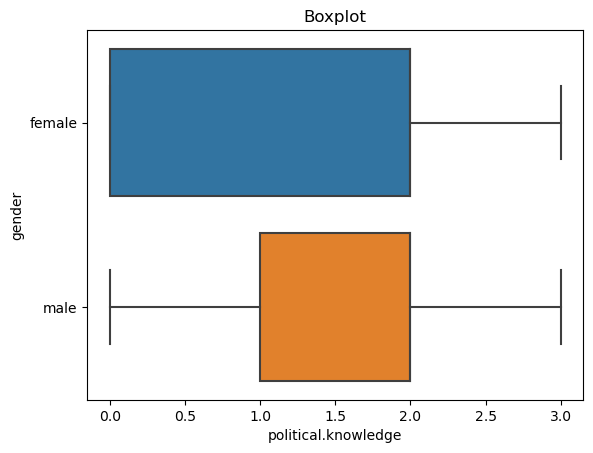

In [550]:
sns.boxplot(data=data, x='political.knowledge', y='gender')
plt.title('Boxplot');

Those who have 0 political.knowledge are mostly Female.

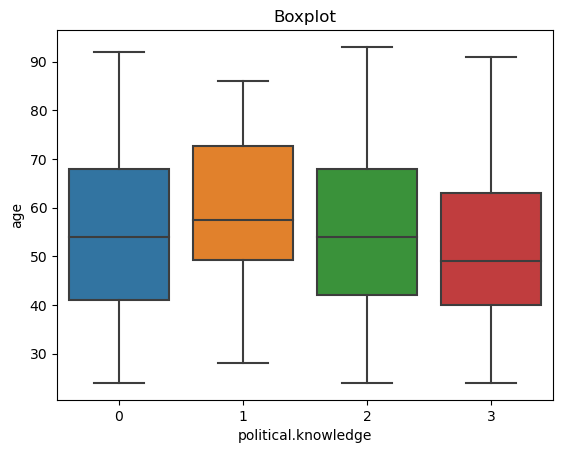

In [551]:
sns.boxplot(data=data, x='political.knowledge', y='age')
plt.title('Boxplot');

We can see that 75 or less then 75% voters who have politcal knowlege as 3 are belongs to age 60 or younger.

### Correlation Plot

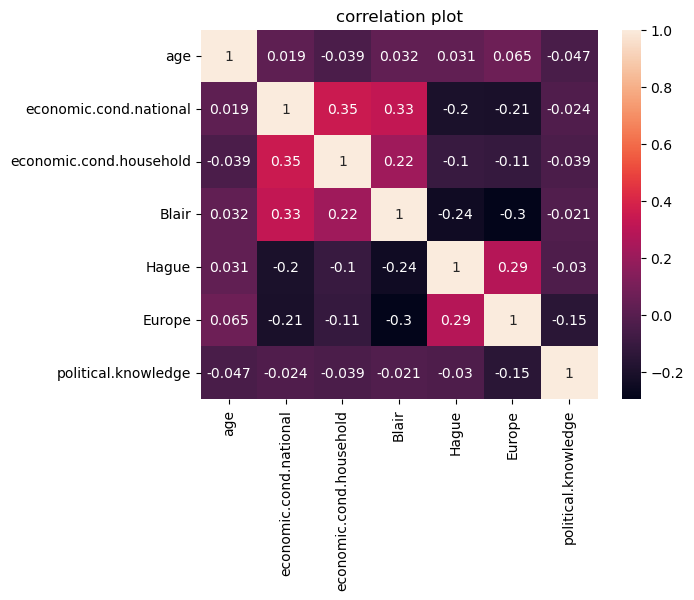

In [552]:
sns.heatmap(data.corr(),annot=True)
plt.title('correlation plot')
plt.show()


As per heatmap no strong correlation observed between the features .

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)


### Encoding the data 

In [553]:
data_dummy = pd.get_dummies(data,drop_first=True)
data_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


#### Checking variance of features

In [554]:
data.var()

age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
dtype: float64

#### Checking standard deviation of features

In [555]:
data.std()

age                        15.701741
economic.cond.national      0.881792
economic.cond.household     0.931069
Blair                       1.174772
Hague                       1.232479
Europe                      3.299043
political.knowledge         1.084417
dtype: float64

Scaling requirment : we know that Scaling is a necessary when using Distance-based models and we can see the difference in the variance of the features so we will perform scaling.

we are using standrdscaler which applied z score and bring mean to 0 and standard deviation to 1

In [556]:
# Copy all the predictor variables into X dataframe
X = data_dummy.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = data_dummy['vote_Labour']

In [557]:
X_scale=X.apply(zscore)

We have successfully scaled the data and now this data can be used for model building.

In [558]:
X_scale.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


### Train Test Split

In [559]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.30 ,
                                                    random_state=1,stratify=data_dummy['vote_Labour'])

In [560]:
y_train.value_counts()


1    739
0    322
Name: vote_Labour, dtype: int64

In [561]:
y_test.value_counts()

1    318
0    138
Name: vote_Labour, dtype: int64

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).


## Building Logistic Regression model

We are using default parameters for building Logistic regression model.

In [562]:
# Fit the Logistic Regression model
model1 = LogisticRegression(random_state=1)
model1.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Predicting on Training and Test dataset

In [563]:
ytrain_predict1 = model1.predict(X_train)
ytest_predict1 = model1.predict(X_test)

### Getting the Predicted Classes and Probs

In [564]:
ytrain_predict_prob=model1.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.151108,0.848892
1,0.017510,0.982490
2,0.591018,0.408982
3,0.139557,0.860443
4,0.098634,0.901366


In [565]:
ytest_predict_prob=model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.201371,0.798629
1,0.609358,0.390642
2,0.084795,0.915205
3,0.031595,0.968405
4,0.136993,0.863007


### Model Evaluation

In [566]:
# Accuracy - Training Data
model1.score(X_train, y_train)

0.827521206409048

In [567]:
# Accuracy - Test Data
model1.score(X_test, y_test)

0.8552631578947368

### Confusion Matrix & classification report for the training data

In [568]:
confusion_matrix(y_train, ytrain_predict1)

array([[213, 109],
       [ 74, 665]], dtype=int64)

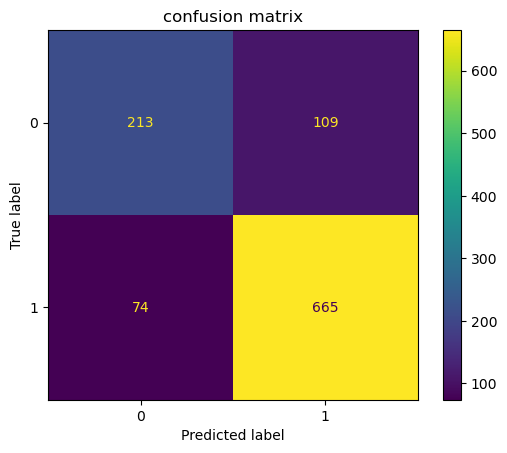

In [569]:
plot_confusion_matrix(model1,X_train,y_train);
plt.title('confusion matrix');

In [570]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



### Confusion Matrix & classification report for the test data

In [571]:
confusion_matrix(y_test, ytest_predict1)

array([[ 94,  44],
       [ 22, 296]], dtype=int64)

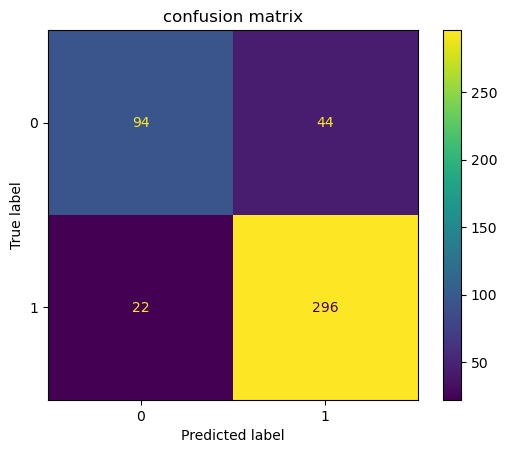

In [572]:
plot_confusion_matrix(model1,X_test,y_test);
plt.title('confusion matrix');

In [573]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



### AUC and ROC for the training data

AUC: 0.877


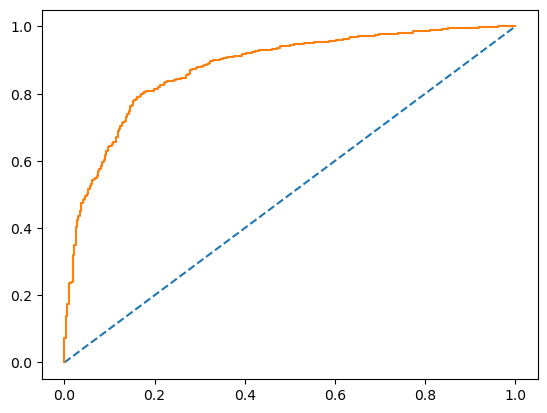

In [574]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the testing data

AUC: 0.877


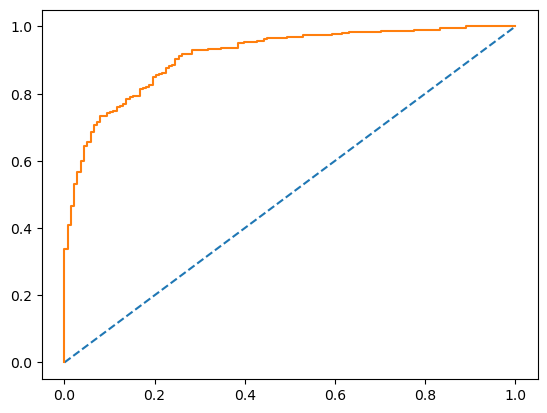

In [575]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

As we can see that we build the model with default parameters and we are getting overall good accuracy on both train and test data.

Accuracy is bit higher in test data compare to train data but it's not too much so we can say that our model don't suffer with overfitting or underfitting.

Auc score is also good 0.87 for both dataset which helping to distinguishing between the positive and negative classes.

## Building Linear Discriminant Analysis (LDA) model

We are using default parameters for building LDA model.

In [576]:
lda = LinearDiscriminantAnalysis()
model2=lda.fit(X_train,y_train)

### Predicting on Training and Test dataset

In [577]:
ytrain_predict = model2.predict(X_train)
ytest_predict = model2.predict(X_test)

### Getting the Predicted Classes and Probs

In [578]:
ytrain_predict_prob=model2.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.120975,0.879025
1,0.011715,0.988285
2,0.616409,0.383591
3,0.134288,0.865712
4,0.077054,0.922946


In [579]:
ytest_predict_prob=model2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.165344,0.834656
1,0.658755,0.341245
2,0.075012,0.924988
3,0.019620,0.980380
4,0.118369,0.881631


### Confusion Matrix & classification report for the training data

In [580]:
confusion_matrix(y_train, ytrain_predict)

array([[217, 105],
       [ 83, 656]], dtype=int64)

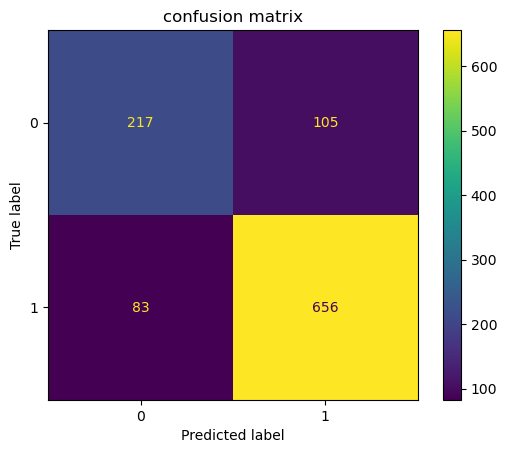

In [581]:
plot_confusion_matrix(model2,X_train,y_train);
plt.title('confusion matrix');

In [582]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



### Confusion Matrix & classification report for the test data

In [583]:
confusion_matrix(y_test, ytest_predict)

array([[ 95,  43],
       [ 24, 294]], dtype=int64)

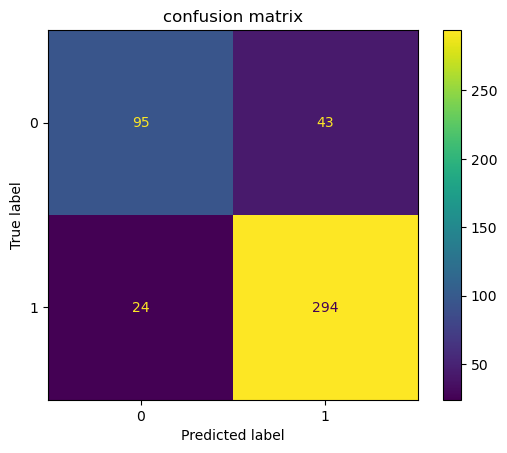

In [584]:
plot_confusion_matrix(model2,X_test,y_test);
plt.title('confusion matrix');

In [585]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



### AUC and ROC for the training data

AUC: 0.877


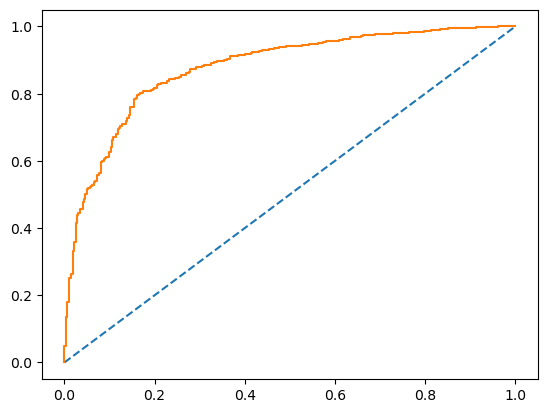

In [586]:
# predict probabilities
probs = model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the testing data

AUC: 0.877


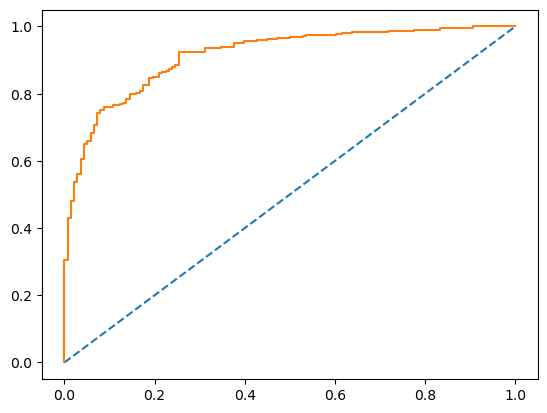

In [587]:
# predict probabilities
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

As we can see that we build the model with default parameters and we are getting overall good accuracy on both train and test data.

Accuracy is bit higher in test data compare to train data but it's not too much so we can say that our model don't suffer with overfitting or underfitting.

Auc score is also good 0.87 for both dataset which helping to distinguishing between the positive and negative classes.

We can see that both the model Logistic regression and LDA perform well in both the data set.

###### We Build the LDA model with scaling data but scaling is not mandatory for LDA so we are trying with original data and will compare the accuracy of model2 and model3.

In [588]:
# Split X and y into training and test set in 70:30 ratio
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30 ,
                                                    random_state=1,stratify=data_dummy['vote_Labour'])

In [589]:
X_train3.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
533,71,3,3,4,2,11,0,0
708,57,4,5,4,1,3,2,0
1144,24,3,4,2,4,11,0,1
1081,43,4,4,2,3,5,0,1
957,37,3,2,4,2,7,2,1


In [590]:
lda = LinearDiscriminantAnalysis()
model3=lda.fit(X_train3,y_train3)

In [591]:
ytrain_predict = model3.predict(X_train3)
ytest_predict = model3.predict(X_test3)

In [592]:
print(classification_report(y_train3, ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [593]:
print(classification_report(y_test3, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



We can see from classification report that accuracy in model2 and model3 are same which means alogorithm work with or wihthout scaling.

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

## Building KNN Model

We are using default parameters for building KNN model.

In [594]:
KNN_model=KNeighborsClassifier()
model4=KNN_model.fit(X_train,y_train)

In [595]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
533,1.067669,-0.278185,-0.148020,0.565802,-0.608329,1.291625,-1.421084,-0.936736
708,0.175754,0.856242,2.000755,0.565802,-1.419969,-1.134120,0.423832,-0.936736
1144,-1.926617,-0.278185,0.926367,-1.137217,1.014951,1.291625,-1.421084,1.067536
1081,-0.716161,0.856242,0.926367,-1.137217,0.203311,-0.527684,-1.421084,1.067536
957,-1.098410,-0.278185,-1.222408,0.565802,-0.608329,0.078753,0.423832,1.067536


### Predicting on Training and Test dataset

In [596]:
ytrain_predict = model4.predict(X_train)
ytest_predict = model4.predict(X_test)

### Confusion Matrix & classification report for the training data

In [597]:
confusion_matrix(y_train, ytrain_predict)

array([[242,  80],
       [ 65, 674]], dtype=int64)

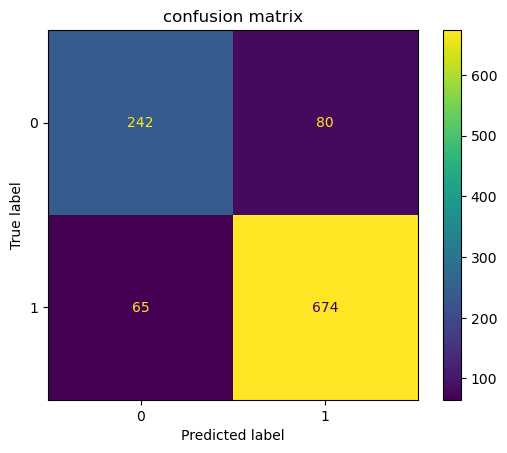

In [598]:
plot_confusion_matrix(model4,X_train,y_train);
plt.title('confusion matrix');

In [599]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.84      1061
weighted avg       0.86      0.86      0.86      1061



### Confusion Matrix & classification report for the test data

In [600]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       138
           1       0.88      0.89      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [601]:
confusion_matrix(y_test, ytest_predict)

array([[100,  38],
       [ 34, 284]], dtype=int64)

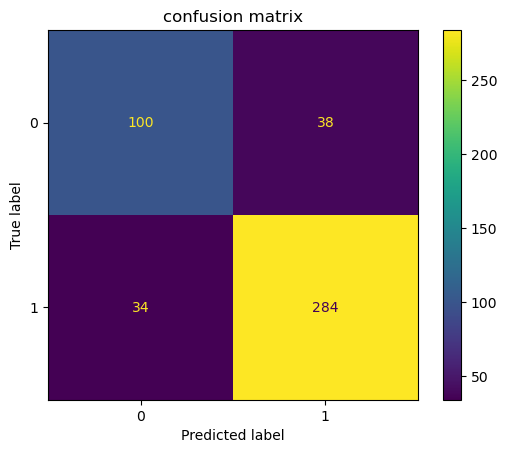

In [602]:
plot_confusion_matrix(model4,X_test,y_test);
plt.title('confusion matrix');

### AUC and ROC for the training data

AUC: 0.926


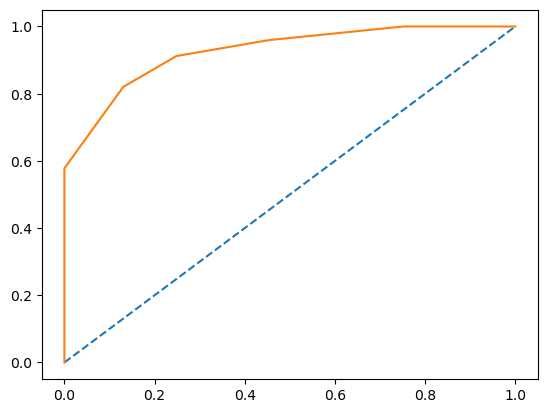

In [603]:
# predict probabilities
probs = model4.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the testing data

AUC: 0.926


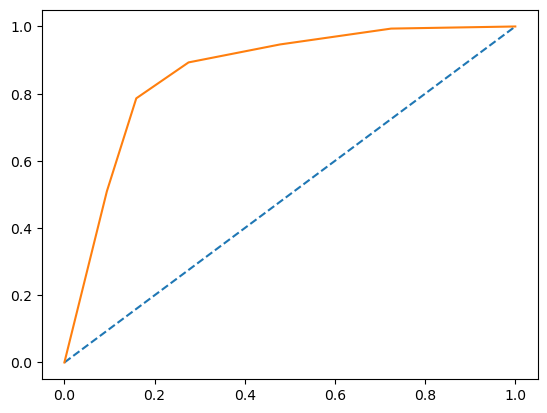

In [604]:
# predict probabilities
probs = model4.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

As we can see that we build the KNN model with default parameters and we are getting overall good accuracy on both train and test data.

Accuracy is bit higher in train data compare to test data but it's not too much so we can say that our model don't suffer with overfitting or underfitting.

Auc score is also good 0.92 for both dataset which is excellent and it helping to distinguishing between the positive and negative classes very effectively.

## Building Naive Bayes Model

We don't need to use scaling for building Naive bayes model as it's not mandatory.

In [605]:
NB_model = GaussianNB()
model5=NB_model.fit(X_train3,y_train3)

### Predicting on Training and Test dataset

In [606]:
ytrain_predict = model5.predict(X_train3)
ytest_predict = model5.predict(X_test3)

### Confusion Matrix & classification report for the training data

In [607]:
confusion_matrix(y_train3, ytrain_predict)

array([[226,  96],
       [ 95, 644]], dtype=int64)

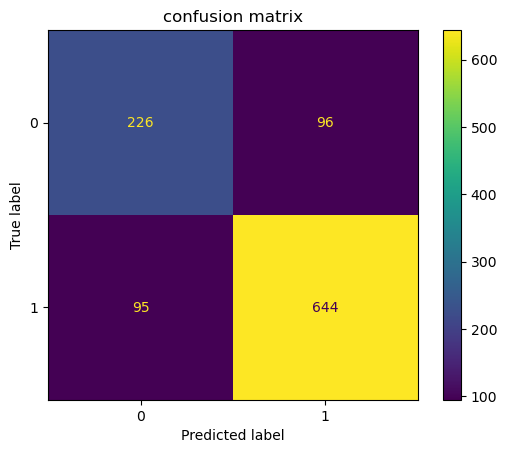

In [608]:
plot_confusion_matrix(model5,X_train3,y_train3);
plt.title('confusion matrix');

In [609]:
print(classification_report(y_train3, ytrain_predict))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



### Confusion Matrix & classification report for the test data

In [610]:
print(classification_report(y_test3, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



In [611]:
confusion_matrix(y_test3, ytest_predict)

array([[100,  38],
       [ 27, 291]], dtype=int64)

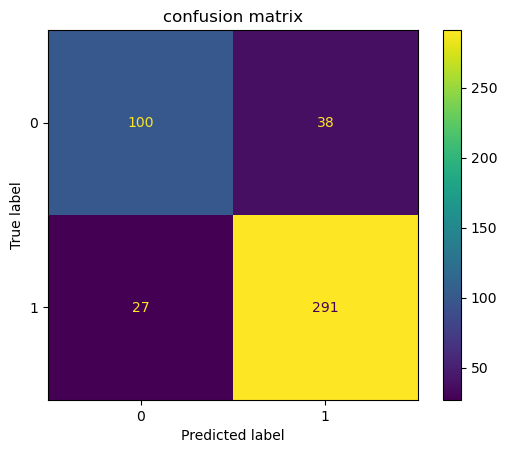

In [612]:
plot_confusion_matrix(model5,X_test3,y_test3);
plt.title('confusion matrix');

### AUC and ROC for the training data

AUC: 0.873


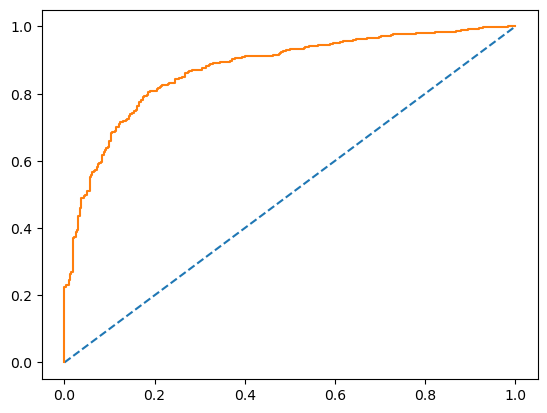

In [613]:
# predict probabilities
probs = model5.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the testing data

AUC: 0.873


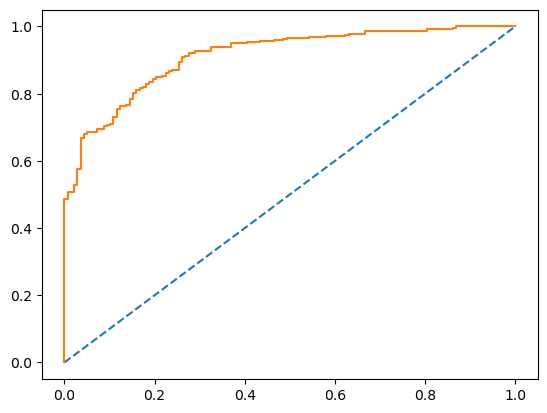

In [614]:
# predict probabilities
probs = model5.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

As we can see that we build the model with default parameters and we are getting overall good accuracy on both train and test data.

Accuracy is bit higher in test data compare to train data but it's not too much so we can say that our model don't suffer with overfitting or underfitting.

Auc score is also good 0.87 for both dataset which helping to distinguishing between the positive and negative classes.

We can see that both the model KNN and Naive Bayes perform well in both the data set.

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

We are not using scaling data for bagging and boosting.

## Random Forest

In [615]:
RF_model=RandomForestClassifier(random_state=1)
model7=RF_model.fit(X_train3, y_train3)

In [616]:
## Performance Matrix on train data set
y_train_predict = model7.predict(X_train3)
model_score =model7.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict))
print(classification_report(y_train3, y_train_predict))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [617]:
## Performance Matrix on test data set
y_test_predict = model7.predict(X_test3)
model_score = model7.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict))
print(classification_report(y_test3, y_test_predict))

0.8399122807017544
[[ 95  43]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



## Ensemble Learning - Bagging

In [618]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(random_state=1)
model6=Bagging_model.fit(X_train3, y_train3)

In [619]:
## Performance Matrix on train data set
y_train_predict = model6.predict(X_train3)
model_score =model6.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict))
print(classification_report(y_train3, y_train_predict))

0.9839773798303487
[[315   7]
 [ 10 729]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       322
           1       0.99      0.99      0.99       739

    accuracy                           0.98      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.98      0.98      0.98      1061



In [620]:
## Performance Matrix on test data set
y_test_predict = model6.predict(X_test3)
model_score = model6.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict))
print(classification_report(y_test3, y_test_predict))

0.8421052631578947
[[101  37]
 [ 35 283]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       138
           1       0.88      0.89      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



## Boosting-Ada Boost

In [621]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(random_state=1)
model8=ADB_model.fit(X_train3,y_train3)

In [622]:
## Performance Matrix on train data set
y_train_predict8 = model8.predict(X_train3)
model_score = model8.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict8))
print(classification_report(y_train3, y_train_predict8))

0.8397737983034873
[[227  95]
 [ 75 664]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [623]:
## Performance Matrix on test data set
y_test_predict8 = model8.predict(X_test3)
model_score = model8.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict8))
print(classification_report(y_test3, y_test_predict8))

0.8355263157894737
[[ 93  45]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



## Gradient Boosting

In [624]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
model9 = gbcl.fit(X_train3, y_train3)

In [625]:
## Performance Matrix on train data set
y_train_predict = model9.predict(X_train3)
model_score = model9.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict))
print(classification_report(y_train3, y_train_predict))

0.885956644674835
[[250  72]
 [ 49 690]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [626]:
## Performance Matrix on test data set
y_test_predict = model9.predict(X_test3)
model_score = model9.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict))
print(classification_report(y_test3, y_test_predict))

0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



We have build multiple models with default parameters and model such as LDA, Logistic regression, gradient boosting, ada boost,KNN and Navie bayes models performing well.

Model such as random forest and bagging showing overfitting because model peforming well in train data but not in test data.

We will use GridSearchCV on all models and will select a model with best parameters.

### Applying GridSearchCV for Logistic Regression

In [627]:
grid={'penalty':['l2','none','elasticnet','l1'],
      'solver':['lbfgs','liblinear','saga','sag','newton-cg'],
      'tol':[0.0001,0.00001,0.001,0.000001]}

In [628]:
model10 = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)

In [629]:
grid_search = GridSearchCV(estimator = model10, param_grid = grid, cv = 4,scoring='f1')

In [630]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             param_grid={'penalty': ['l2', 'none', 'elasticnet', 'l1'],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'sag',
                                    'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.001, 1e-06]},
             scoring='f1')

In [631]:
best_model = grid_search.best_estimator_

In [632]:
best_model.coef_

array([[-0.20973177,  0.30843439,  0.03054524,  0.64868984, -1.06092159,
        -0.68621463, -0.44024848,  0.02493989]])

In [633]:
# Prediction on the training & testing set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 



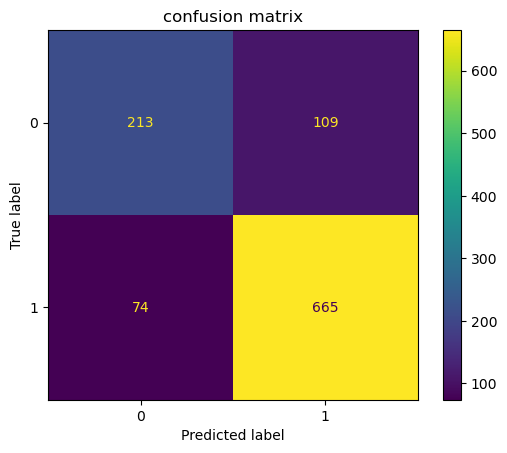

In [634]:
## Confusion matrix & classification report on the training data
plot_confusion_matrix(best_model,X_train,y_train)
plt.title('confusion matrix');
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



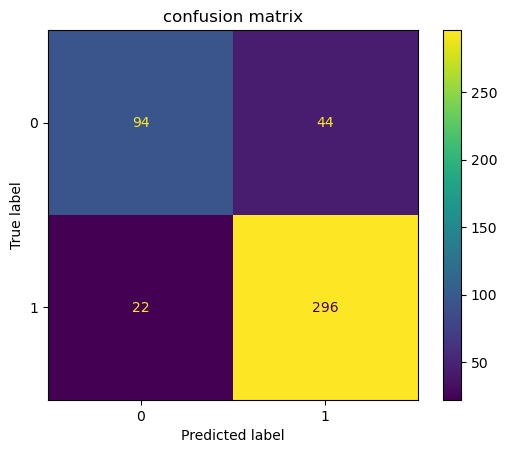

In [635]:
## Confusion matrix & classification report on the test data
plot_confusion_matrix(best_model,X_test,y_test)
plt.title('confusion matrix');
print(classification_report(y_test, ytest_predict),'\n');

Even After trying different hyper parameters logistic regression model accuracy is same what we got with default parameters.

### Applying GridSearchCV for LDA

In [636]:
grid={'solver':['lsqr','eigen'],
      'tol':[0.0001,0.00001]}

In [637]:
model11 = LinearDiscriminantAnalysis(priors= [0.5,0.5] )

In [638]:
grid_search = GridSearchCV(estimator = model11, param_grid = grid, cv = 3,scoring='f1')

In [639]:
grid_search.fit(X_train3, y_train3)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(priors=[0.5, 0.5]),
             param_grid={'solver': ['lsqr', 'eigen'], 'tol': [0.0001, 1e-05]},
             scoring='f1')

In [640]:
best_model_LDA = grid_search.best_estimator_

In [641]:
# Prediction on the training & testing set
ytrain_predict_best_model = best_model_LDA.predict(X_train3)
ytest_predict_best_model = best_model_LDA.predict(X_test3)

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       322
           1       0.91      0.80      0.85       739

    accuracy                           0.80      1061
   macro avg       0.77      0.80      0.78      1061
weighted avg       0.82      0.80      0.81      1061
 



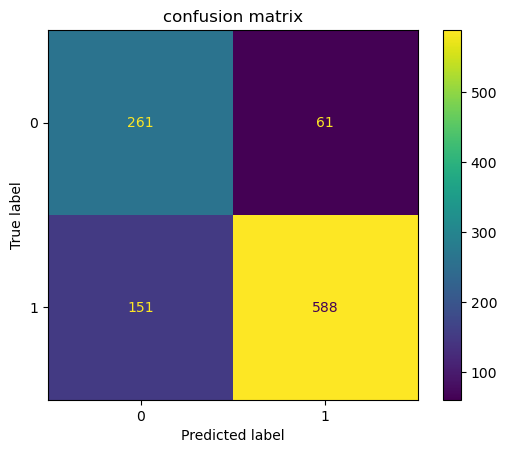

In [642]:
## Confusion matrix & classification report on the training data
print(classification_report(y_train3, ytrain_predict_best_model),'\n');
plot_confusion_matrix(best_model_LDA,X_train3,y_train3)
plt.title('confusion matrix');

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       138
           1       0.91      0.83      0.87       318

    accuracy                           0.83       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.84      0.83      0.83       456
 



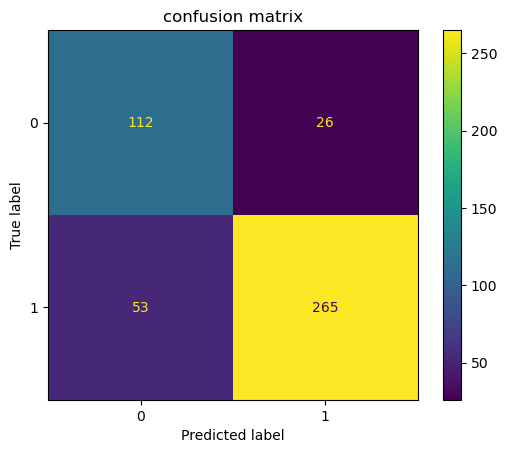

In [643]:
## Confusion matrix & classification report on the test data
print(classification_report(y_test3, ytest_predict_best_model),'\n');
plot_confusion_matrix(best_model_LDA,X_test3,y_test3)
plt.title('confusion matrix');

After trying different hyper parameters LDA model accuracy changed but still test data accuracy is slighlty higher than train data.

### Tuning KNN model

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [644]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.19517543859649122,
 0.15131578947368418,
 0.1578947368421053,
 0.15131578947368418,
 0.14473684210526316,
 0.14254385964912286,
 0.13815789473684215,
 0.13815789473684215,
 0.14254385964912286,
 0.14473684210526316]

##### Plot misclassification error vs k (with k value on X-axis) using matplotlib

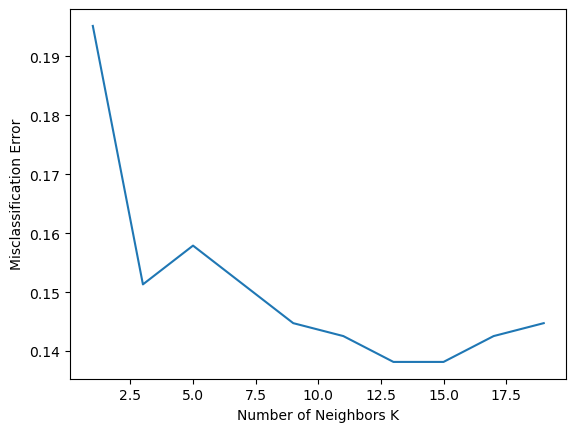

In [645]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 13,15 it is giving the minimum Misclassification Error.

In [646]:
KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [647]:
# Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8397737983034873
[[229  93]
 [ 77 662]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       322
           1       0.88      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [648]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8618421052631579
[[105  33]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       138
           1       0.90      0.91      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.84       456
weighted avg       0.86      0.86      0.86       456



After trying different value of K we are getting slight difference in train and test accuracy but when K=7 train and test accuracy is quite same.

In [649]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
model12=KNN_model.fit(X_train,y_train)

In [650]:
# Performance Matrix on train data set
y_train_predict12 = model12.predict(X_train)
model_score = model12.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict12))
print(classification_report(y_train, y_train_predict12))

0.8520263901979265
[[234  88]
 [ 69 670]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       322
           1       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [651]:
## Performance Matrix on test data set
y_test_predict12 = model12.predict(X_test)
model_score = model12.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict12))
print(classification_report(y_test, y_test_predict12))

0.8486842105263158
[[104  34]
 [ 35 283]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       138
           1       0.89      0.89      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456



### Tuning Naive Bayes model

In [652]:
NB_model = GaussianNB(priors=[0.4,0.6])
model13=NB_model.fit(X_train3, y_train3)

In [653]:
## Performance Matrix on train data set
y_train_predict13 = model13.predict(X_train3)
model_score = model13.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict13))
print(classification_report(y_train3, y_train_predict13))

0.8152686145146089
[[242  80]
 [116 623]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       322
           1       0.89      0.84      0.86       739

    accuracy                           0.82      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [654]:
## Performance Matrix on test data set
y_test_predict13 = model13.predict(X_test3)
model_score = model13.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict13))
print(classification_report(y_test3, y_test_predict13))

0.8333333333333334
[[106  32]
 [ 44 274]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       138
           1       0.90      0.86      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.84      0.83      0.84       456



By changing prior probabilities we are able to minimize the difference in the train and test accuracy.

### Tuning Random Forest

We saw overfitting in random forest which we build with default paramters so now We will use grid search to identify best parameters values for our model.

In [655]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_searchrf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 4)

In [656]:
grid_searchrf.fit(X_train3, y_train3)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [657]:
print(grid_searchrf.best_params_)
print(grid_searchrf.best_estimator_)

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 150, 'n_estimators': 501}
RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=501, random_state=1)


In [658]:
print(grid_searchrf.score(X_train3,y_train3))
print(grid_searchrf.score(X_test3,y_test3))

0.8086710650329878
0.831140350877193


In [659]:
param_grid = {
    'max_depth': [12,15,17],
    'max_features': [8,9,10],
    'min_samples_leaf': [20,40],
    'min_samples_split': [30,60,80],
    'n_estimators': [301,501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_searchrf1 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [660]:
grid_searchrf1.fit(X_train3, y_train3)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [12, 15, 17], 'max_features': [8, 9, 10],
                         'min_samples_leaf': [20, 40],
                         'min_samples_split': [30, 60, 80],
                         'n_estimators': [301, 501]})

In [661]:
print(grid_searchrf1.best_params_)
print(grid_searchrf1.best_estimator_)

{'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 20, 'min_samples_split': 60, 'n_estimators': 501}
RandomForestClassifier(max_depth=12, max_features=8, min_samples_leaf=20,
                       min_samples_split=60, n_estimators=501, random_state=1)


In [662]:
print(grid_searchrf1.score(X_train3,y_train3))
print(grid_searchrf1.score(X_test3,y_test3))

0.8303487276154571
0.8421052631578947


We improved the train score by using different parameters and train test accuracy has slight difference which can be ignored.

Now we will build final Random forest model with best parameters.

In [663]:
reg_rfcl = RandomForestClassifier(n_estimators = 501,
                                  max_features=8,
                                  random_state=1,
                                  max_depth= 12,
                                  min_samples_leaf= 20,
                                  min_samples_split=60
                                  )

In [664]:
model14=reg_rfcl.fit(X_train3,y_train3)

In [665]:
print (pd.DataFrame(model14.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train3.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.464283
Europe                   0.190127
Blair                    0.159287
political.knowledge      0.121600
age                      0.029907
economic.cond.national   0.026184
economic.cond.household  0.007305
gender_male              0.001307


In [666]:
## Performance Matrix on train data set
y_train_predict14 = model14.predict(X_train3)
model_score =model14.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict14))
print(classification_report(y_train3, y_train_predict14))

0.8303487276154571
[[202 120]
 [ 60 679]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       322
           1       0.85      0.92      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.82      1061



In [667]:
## Performance Matrix on test data set
y_test_predict14 = model14.predict(X_test3)
model_score = model14.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict14))
print(classification_report(y_test3, y_test_predict14))

0.8421052631578947
[[ 86  52]
 [ 20 298]]
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       138
           1       0.85      0.94      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.78      0.80       456
weighted avg       0.84      0.84      0.84       456



### Tuning Bagging model

In [668]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [20,40,60,80,100],
    'min_samples_leaf': [15,20,25,30], 
    'min_samples_split': [150,300,450,600],
}

dt = DecisionTreeClassifier(random_state=1)

grid_search_dt4 = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 10)

In [669]:
grid_search_dt4.fit(X_train3,y_train3)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'],
                         'max_depth': [20, 40, 60, 80, 100],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'min_samples_split': [150, 300, 450, 600]})

In [670]:
print(grid_search_dt4.best_params_)
print(grid_search_dt4.best_estimator_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 15, 'min_samples_split': 150}
DecisionTreeClassifier(max_depth=20, min_samples_leaf=15, min_samples_split=150,
                       random_state=1)


In [671]:
dt = DecisionTreeClassifier(random_state=1,criterion='gini', max_depth= 20, min_samples_leaf= 15, min_samples_split= 150)

In [672]:
Bagging_model=BaggingClassifier(base_estimator=dt,random_state=1, n_estimators = 500, max_samples = 0.5, max_features = 0.5)
model15=Bagging_model.fit(X_train3, y_train3)

In [673]:
## Performance Matrix on train data set
y_train_predict15 = model15.predict(X_train3)
model_score =model15.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict15))
print(classification_report(y_train3, y_train_predict15))

0.7917059377945335
[[133 189]
 [ 32 707]]
              precision    recall  f1-score   support

           0       0.81      0.41      0.55       322
           1       0.79      0.96      0.86       739

    accuracy                           0.79      1061
   macro avg       0.80      0.68      0.71      1061
weighted avg       0.79      0.79      0.77      1061



In [674]:
## Performance Matrix on test data set
y_test_predict15 = model15.predict(X_test3)
model_score = model15.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict15))
print(classification_report(y_test3, y_test_predict15))

0.8179824561403509
[[ 66  72]
 [ 11 307]]
              precision    recall  f1-score   support

           0       0.86      0.48      0.61       138
           1       0.81      0.97      0.88       318

    accuracy                           0.82       456
   macro avg       0.83      0.72      0.75       456
weighted avg       0.82      0.82      0.80       456



We are able to reduce the overfitting with the help of Gridsearch CV.

### Tuning Boosting models

In [675]:
param_grid = {
    'n_estimators': [60,70,105,150,200,300,400,501],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

ADB_model = AdaBoostClassifier(random_state=1)

grid_search = GridSearchCV(estimator = ADB_model, param_grid = param_grid, n_jobs=-1, cv=3, scoring='accuracy')

In [676]:
grid_search.fit(X_train3,y_train3)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [60, 70, 105, 150, 200, 300, 400,
                                          501]},
             scoring='accuracy')

In [677]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [678]:
ADB_model = AdaBoostClassifier(random_state=1,learning_rate= 0.1, n_estimators= 150)
model16=ADB_model.fit(X_train3,y_train3)

In [679]:
## Performance Matrix on train data set
y_train_predict = model16.predict(X_train3)
model_score = model16.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict))
print(classification_report(y_train3, y_train_predict))

0.8312912346842601
[[211 111]
 [ 68 671]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.70       322
           1       0.86      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [680]:
## Performance Matrix on test data set
y_test_predict = model16.predict(X_test3)
model_score = model16.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict))
print(classification_report(y_test3, y_test_predict))

0.8442982456140351
[[ 89  49]
 [ 22 296]]
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       138
           1       0.86      0.93      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



We are not getting anything better accuracy even with the different parameters obtained from GridsearchCv so will go with our base mode.

### GradientBoosting Tuning

In [681]:
param_grid = {
    "n_estimators":[20,40,60],
    "max_depth":[3,8,10],
    "learning_rate":[0.01,0.1,1,10]}

gbcl = GradientBoostingClassifier(random_state=1)

grid_search = GridSearchCV(estimator = gbcl, param_grid = param_grid, cv=3 )

In [682]:
grid_search.fit(X_train3, y_train3)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [3, 8, 10],
                         'n_estimators': [20, 40, 60]})

In [683]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}

In [684]:
gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, max_depth= 3, n_estimators=40)
model17 = gbcl.fit(X_train3, y_train3)

In [685]:
## Performance Matrix on train data set
y_train_predict17 = model17.predict(X_train3)
model_score = model17.score(X_train3, y_train3)
print(model_score)
print(confusion_matrix(y_train3, y_train_predict17))
print(classification_report(y_train3, y_train_predict17))

0.8614514608859567
[[234  88]
 [ 59 680]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       322
           1       0.89      0.92      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [686]:
## Performance Matrix on test data set
y_test_predict17 = model17.predict(X_test3)
model_score = model17.score(X_test3, y_test3)
print(model_score)
print(confusion_matrix(y_test3, y_test_predict17))
print(classification_report(y_test3, y_test_predict17))

0.8508771929824561
[[ 97  41]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.88      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



With the help of Gridsearch best parameters we are able to reduce the overfitting in the model as now difference in train test score is minimized.

So thus we have tuned all the models and in KNN, Navie bayes we did not use Gridsearch but we tried different K values in KNN and different prior probability in Navie Bayes model.

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

### For Logistic Regression Confusion Matrix , Classification Report, AUC and ROC for the training data 

In [687]:
confusion_matrix(y_train, ytrain_predict1)

array([[213, 109],
       [ 74, 665]], dtype=int64)

In [688]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



AUC: 0.877


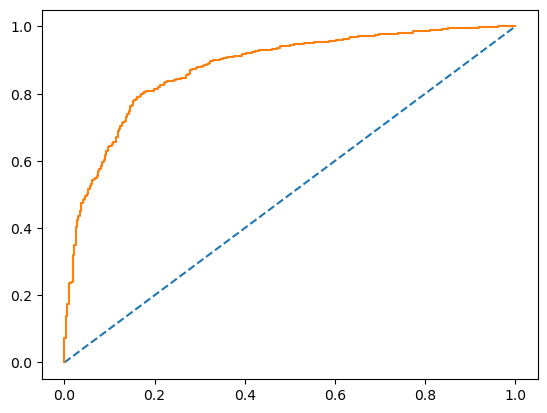

In [689]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Logistic Regression Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [690]:
confusion_matrix(y_test, ytest_predict1)

array([[ 94,  44],
       [ 22, 296]], dtype=int64)

In [691]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



AUC: 0.877


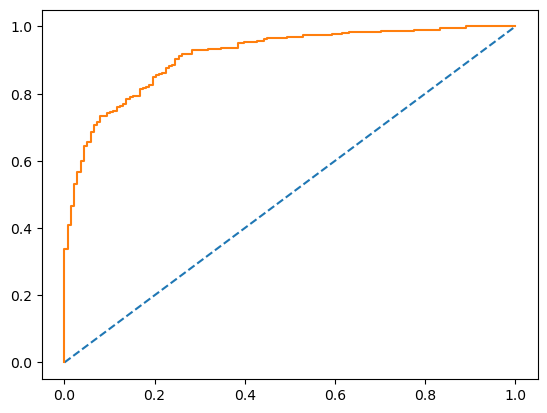

In [692]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### For LDA Confusion Matrix , Classification Report, AUC and ROC for the training data

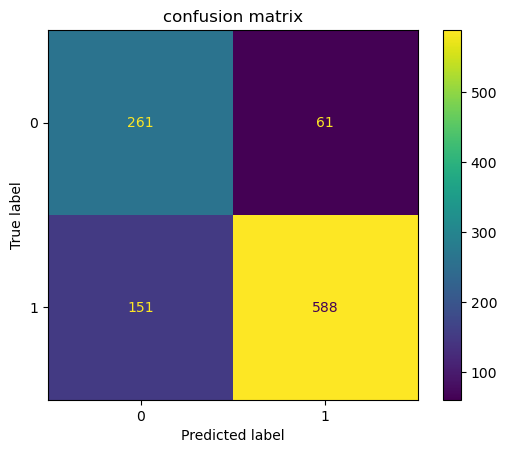

In [693]:
plot_confusion_matrix(best_model_LDA,X_train3,y_train3)
plt.title('confusion matrix');

In [694]:
print(classification_report(y_train3, ytrain_predict_best_model),'\n');

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       322
           1       0.91      0.80      0.85       739

    accuracy                           0.80      1061
   macro avg       0.77      0.80      0.78      1061
weighted avg       0.82      0.80      0.81      1061
 



AUC: 0.877


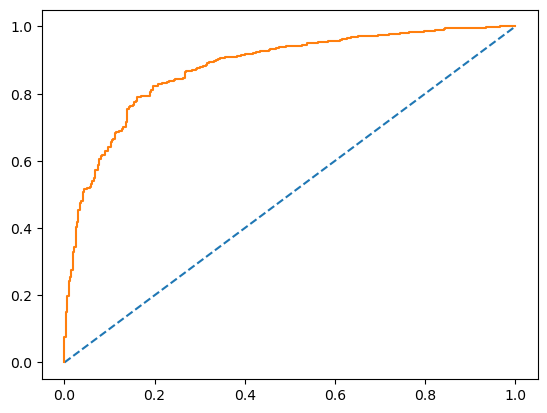

In [695]:
# predict probabilities
probs = best_model_LDA.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For LDA Confusion Matrix , Classification Report, AUC and ROC for the testing data

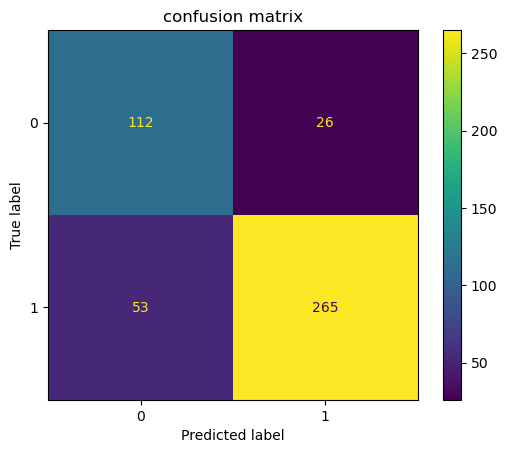

In [696]:
plot_confusion_matrix(best_model_LDA,X_test3,y_test3)
plt.title('confusion matrix');

In [697]:
print(classification_report(y_test3, ytest_predict_best_model),'\n');

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       138
           1       0.91      0.83      0.87       318

    accuracy                           0.83       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.84      0.83      0.83       456
 



AUC: 0.877


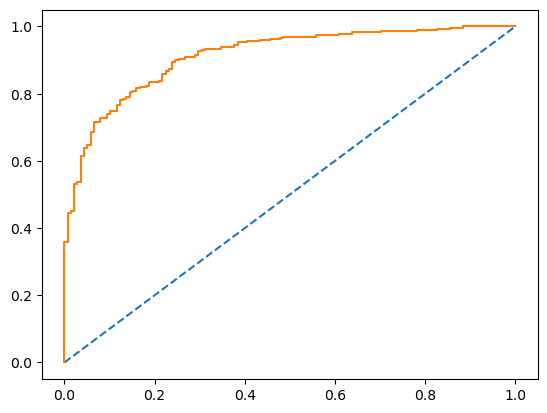

In [698]:
# predict probabilities
probs = best_model_LDA.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### For KNN Confusion Matrix , Classification Report, AUC and ROC for the training data

In [699]:
print(confusion_matrix(y_train, y_train_predict12))

[[234  88]
 [ 69 670]]


In [700]:
print(classification_report(y_train, y_train_predict12))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       322
           1       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.918


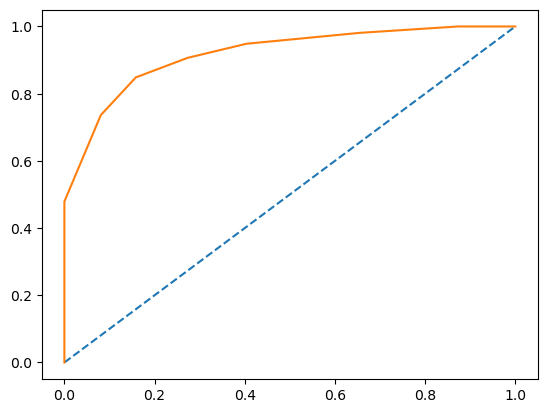

In [701]:
# predict probabilities
probs = model12.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For KNN Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [702]:
print(confusion_matrix(y_test, y_test_predict12))

[[104  34]
 [ 35 283]]


In [703]:
print(classification_report(y_test, y_test_predict12))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       138
           1       0.89      0.89      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456



AUC: 0.876


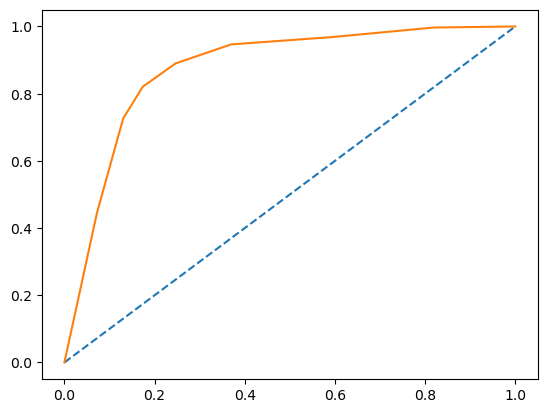

In [704]:
# predict probabilities
probs = model12.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Naive Bayes  Confusion Matrix , Classification Report, AUC and ROC for the training data

In [705]:
print(confusion_matrix(y_train3, y_train_predict13))

[[242  80]
 [116 623]]


In [706]:
print(classification_report(y_train3, y_train_predict13))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       322
           1       0.89      0.84      0.86       739

    accuracy                           0.82      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.82      0.82      0.82      1061



AUC: 0.873


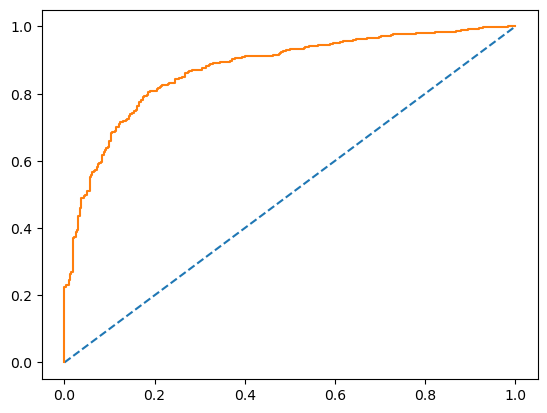

In [707]:
# predict probabilities
probs = model13.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Naive Bayes Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [708]:
print(confusion_matrix(y_test3, y_test_predict13))

[[106  32]
 [ 44 274]]


In [709]:
print(classification_report(y_test3, y_test_predict13))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       138
           1       0.90      0.86      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.84      0.83      0.84       456



AUC: 0.912


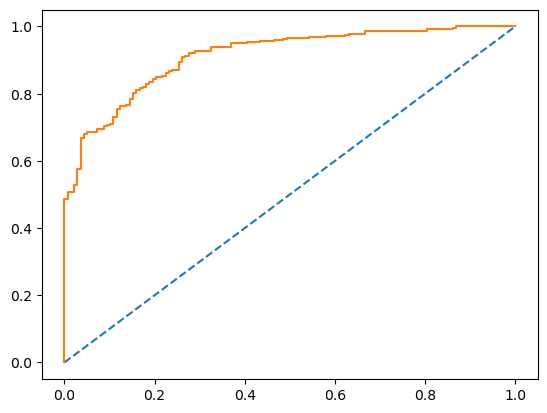

In [710]:
# predict probabilities
probs = model13.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Random Forest Confusion Matrix , Classification Report, AUC and ROC for the training data

In [711]:
print(confusion_matrix(y_train3, y_train_predict14))

[[202 120]
 [ 60 679]]


In [712]:
print(classification_report(y_train3, y_train_predict14))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       322
           1       0.85      0.92      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.83      0.82      1061



AUC: 0.899


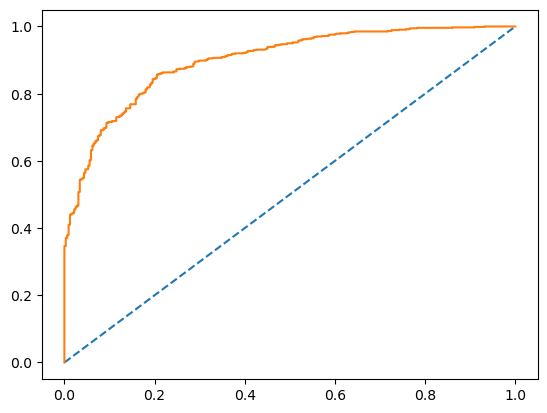

In [713]:
# predict probabilities
probs = model14.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Random Forest Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [714]:
print(confusion_matrix(y_test3, y_test_predict14))

[[ 86  52]
 [ 20 298]]


In [715]:
print(classification_report(y_test3, y_test_predict14))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       138
           1       0.85      0.94      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.78      0.80       456
weighted avg       0.84      0.84      0.84       456



AUC: 0.913


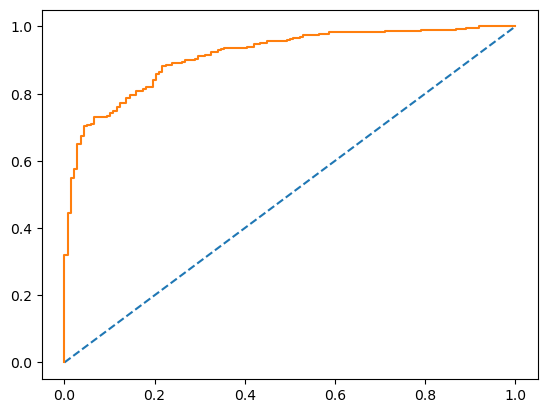

In [716]:
# predict probabilities
probs = model14.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Bagging Confusion Matrix , Classification Report, AUC and ROC for the training data

In [717]:
print(confusion_matrix(y_train3, y_train_predict15))

[[133 189]
 [ 32 707]]


In [718]:
print(classification_report(y_train3, y_train_predict15))

              precision    recall  f1-score   support

           0       0.81      0.41      0.55       322
           1       0.79      0.96      0.86       739

    accuracy                           0.79      1061
   macro avg       0.80      0.68      0.71      1061
weighted avg       0.79      0.79      0.77      1061



AUC: 0.885


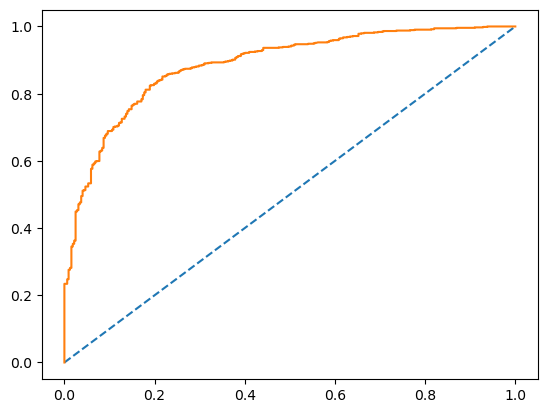

In [719]:
# predict probabilities
probs = model15.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Bagging Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [720]:
print(confusion_matrix(y_test3, y_test_predict15))

[[ 66  72]
 [ 11 307]]


In [721]:
print(classification_report(y_test3, y_test_predict15))

              precision    recall  f1-score   support

           0       0.86      0.48      0.61       138
           1       0.81      0.97      0.88       318

    accuracy                           0.82       456
   macro avg       0.83      0.72      0.75       456
weighted avg       0.82      0.82      0.80       456



AUC: 0.914


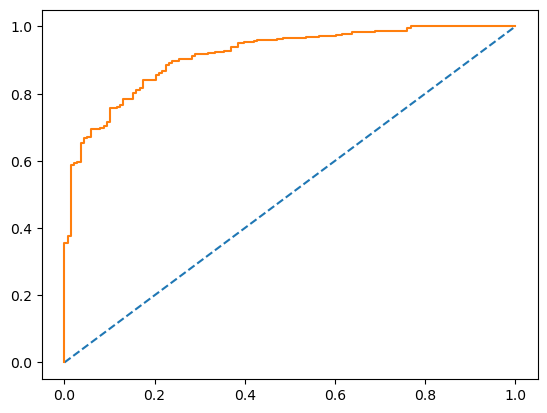

In [722]:
# predict probabilities
probs = model15.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Ada Boost Confusion Matrix , Classification Report, AUC and ROC for the training data

In [723]:
print(confusion_matrix(y_train3, y_train_predict8))


[[227  95]
 [ 75 664]]


In [724]:
print(classification_report(y_train3, y_train_predict8))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.900


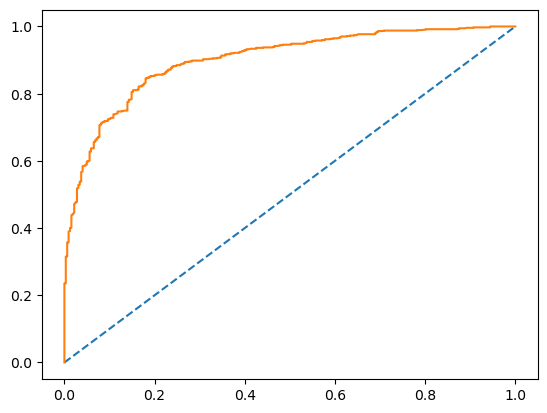

In [725]:
# predict probabilities
probs = model8.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Ada Boost Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [726]:
print(confusion_matrix(y_test3, y_test_predict8))

[[ 93  45]
 [ 30 288]]


In [727]:
print(classification_report(y_test3, y_test_predict8))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.910


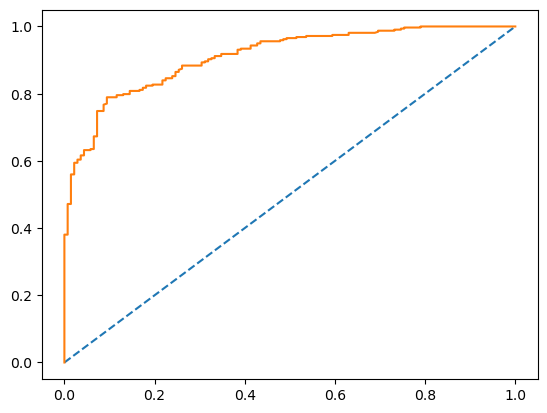

In [728]:
# predict probabilities
probs = model8.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Gradient Boosting Confusion Matrix , Classification Report, AUC and ROC for the training data

In [729]:
print(confusion_matrix(y_train3, y_train_predict17))

[[234  88]
 [ 59 680]]


In [730]:
print(classification_report(y_train3, y_train_predict17))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       322
           1       0.89      0.92      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



AUC: 0.928


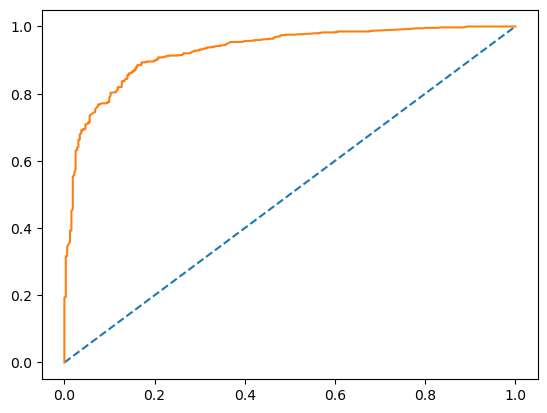

In [731]:
# predict probabilities
probs = model17.predict_proba(X_train3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### For Gradient Boosting Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [732]:
print(confusion_matrix(y_test3, y_test_predict17))

[[ 97  41]
 [ 27 291]]


In [733]:
print(classification_report(y_test3, y_test_predict17))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.88      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



AUC: 0.910


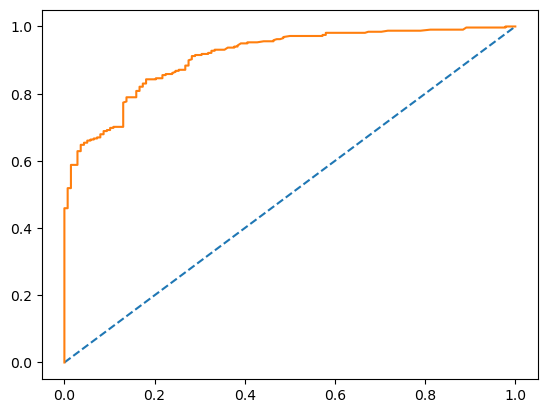

In [734]:
# predict probabilities
probs = model17.predict_proba(X_test3)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test3, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test3, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [735]:
index=['Accuracy','Recall','Precision','F1 Score','AUC']
dataa = pd.DataFrame({'LR Train':[0.83,0.90,0.86,0.88,0.88],
        'LR Test':[0.86,0.93,0.87,0.90,0.88],
       'LDA Train':[0.80,0.80,0.91,0.85,0.88],
        'LDA Test':[0.83,0.83,0.91,0.87,0.88],
        'KNN Train':[0.85,0.91,0.88,0.90,0.92],
        'KNN test' :[0.85,0.89,0.89,0.89,0.88],
        'Naive Bayes Train':[0.82,0.84,0.89,0.86,0.87],
        'Naive Bayes test' :[0.83,0.86,0.90,0.88,0.91],
        'Bagging Train'    :[0.79,0.96,0.79,0.86,0.88],
        'Bagging test'     :[0.82,0.97,0.81,0.88,0.91],
        'Random Forest Train':[0.83,0.92,0.85,0.88,0.90],
        'Random Forest test' :[0.84,0.94,0.85,0.89,0.91],
        'AdaBoost Train'   :[0.84,0.90,0.87,0.89,0.90],
        'AdaBoost test'    :[0.84,0.91,0.86,0.88,0.91],
        'Gradient boost Train' :[0.86,0.92,0.89,0.90,0.93],
        'Gradient boost test'  :[0.85,0.92,0.88,0.90,0.91] },index=index)
round(dataa,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN test,Naive Bayes Train,Naive Bayes test,Bagging Train,Bagging test,Random Forest Train,Random Forest test,AdaBoost Train,AdaBoost test,Gradient boost Train,Gradient boost test
Accuracy,0.83,0.86,0.80,0.83,0.85,0.85,0.82,0.83,0.79,0.82,0.83,0.84,0.84,0.84,0.86,0.85
Recall,0.90,0.93,0.80,0.83,0.91,0.89,0.84,0.86,0.96,0.97,0.92,0.94,0.90,0.91,0.92,0.92
Precision,0.86,0.87,0.91,0.91,0.88,0.89,0.89,0.90,0.79,0.81,0.85,0.85,0.87,0.86,0.89,0.88
F1 Score,0.88,0.90,0.85,0.87,0.90,0.89,0.86,0.88,0.86,0.88,0.88,0.89,0.89,0.88,0.90,0.90
AUC,0.88,0.88,0.88,0.88,0.92,0.88,0.87,0.91,0.88,0.91,0.90,0.91,0.90,0.91,0.93,0.91


We build total 8 models and after tuning almost every model performing well.

We are going with a model which has almost no overfitting/underfitting.

We short list 3 models sucs as : KNN, AdaBoost, Gradient boost because these models have almost no overfitting/underfitting.

In our dataset both classes are important so recall and precision both are necessary to observe.

After comapraing Precision and recall score for all these 3 models we are getting higher score in Model-Gradient boost for both classes.

# 1.8 Based on these predictions, what are the insights?

### Insights:

1.  We have observed that Gradient boost is best model with 0.90 F1 score.

2. We want to reduce false positive and false negative as we don't want many false prediction because both classess are important.

3. In model Gradient boost we are getting minimum false postive and false negative in both the train and test dataset.

4. Out of all postive preditcted 89% was actually positive as per precision.

5. Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a very good model for classification

### Recommendations:

1. As per best coeficient and feature_importances variablels like: Blair, Hague,Europe and political.knowledge are the important variables for predictions.

2. We have seen earlier that Female voters are more involved in voting compare to male so need to check why males are not coming for voting.

3. In our dataset classes are biased towards party 'Labour' though it's not completely biased but if we can get more observations for other class that can give more information.

4. Voters needs to get some political knowledge which help to choose a particular party so past history of party and party's candidate can be shared.

5. In conservative party mostly have high ‘Eurosceptic’ sentiment and it depends on the condition whether having high esntiment is good or bad.

6. Those who have political knowlege 2 or more are part of all age group from young to old and they suppose to share their knowlege to others who have 0 political knowledge.

7.  Assesment of Conservative party leader is not so good as many rate him/her with 2 Assesment score and that might be the reason that people are less intrested in conservative party.

8. Though mostly gives good Assesment score to Labour party's Leader but there are some assesment score as 2 so this needs to be looked out.

## Analysis on Problem 2:

In [777]:
import nltk

In [778]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [779]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [780]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [781]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [782]:
Roosevelt=inaugural.raw('1941-Roosevelt.txt')

In [783]:
Kennedy=inaugural.raw('1961-Kennedy.txt')

In [784]:
Nixon=inaugural.raw('1973-Nixon.txt')

# 2.1 Find the number of characters, words, and sentences for the mentioned documents.

### Number of Characters in txt files

In [785]:
Number_of_characters=len(Roosevelt)

In [786]:
print ('Number of characters in Roosevelt.txt:',Number_of_characters)

Number of characters in Roosevelt.txt: 7571


In [787]:
Number_of_characters=len(Kennedy)

In [788]:
print ('Number of characters in Kennedy.txt:',Number_of_characters)

Number of characters in Kennedy.txt: 7618


In [789]:
Number_of_characters=len(Nixon)

In [790]:
print ('Number of characters in Nixon.txt:', Number_of_characters)

Number of characters in Nixon.txt: 9991


### Number of words in txt files

In [791]:
words=inaugural.raw('1941-Roosevelt.txt').split()

In [792]:
print ('Number of words in Roosevelt.txt:', len(words))

Number of words in Roosevelt.txt: 1360


In [793]:
words=inaugural.raw('1961-Kennedy.txt').split()

In [794]:
print ('Number of words in Kennedy.txt:', len(words))

Number of words in Kennedy.txt: 1390


In [795]:
words=inaugural.raw('1973-Nixon.txt').split()

In [796]:
print ('Number of words in Nixon.txt:', len(words))

Number of words in Nixon.txt: 1819


### Number of sentences in txt files

In [797]:
sent= nltk.sent_tokenize(inaugural.raw('1941-Roosevelt.txt'))

In [798]:
print('Number of sentences in 1941-Roosevelt.txt file is:', len(sent))

Number of sentences in 1941-Roosevelt.txt file is: 68


In [799]:
sent= nltk.sent_tokenize(inaugural.raw('1961-Kennedy.txt'))

In [800]:
print('Number of sentences in 1961-Kennedy.txt file is:', len(sent))

Number of sentences in 1961-Kennedy.txt file is: 52


In [801]:
sent= nltk.sent_tokenize(inaugural.raw('1973-Nixon.txt'))

In [802]:
print('Number of sentences in 1973-Nixon.txt file is:', len(sent))

Number of sentences in 1973-Nixon.txt file is: 68


# 2.2 Remove all the stopwords from all three speeches.

##### Before removing stop words we are converting words to lowercase 

In [803]:
import string
stopwordss=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [804]:
print(stopwordss)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Removing all the stopwords from 1941-Roosevelt.txt file.

In [805]:
all_words_clean1=[]
def clean(x):
    for word in x:
        if word not in stopwordss:
            all_words_clean1.append(word)
            
clean(inaugural.raw('1941-Roosevelt.txt').lower().split())
all_words_clean1

['national',
 'day',
 'inauguration',
 'since',
 '1789,',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states.',
 "washington's",
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation.',
 "lincoln's",
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within.',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without.',
 'us',
 'come',
 'time,',
 'midst',
 'swift',
 'happenings,',
 'pause',
 'moment',
 'take',
 'stock',
 '--',
 'recall',
 'place',
 'history',
 'been,',
 'rediscover',
 'may',
 'be.',
 'not,',
 'risk',
 'real',
 'peril',
 'inaction.',
 'lives',
 'nations',
 'determined',
 'count',
 'years,',
 'lifetime',
 'human',
 'spirit.',
 'life',
 'man',
 'three-score',
 'years',
 'ten:',
 'little',
 'more,',
 'little',
 'less.',
 'life',
 'nation',
 'fullness',
 'measure',
 'live.',
 'men',
 'doubt',
 'this.',
 'men',
 'believe',
 'democracy,',
 'form',
 'government',
 'frame',
 'life,',
 'limited',


In [806]:
print('Number of words after removing stop words and punctuation:', len(all_words_clean1))

Number of words after removing stop words and punctuation: 666


#### Removing all the stopwords from 1961-Kennedy.txt file.

In [807]:
all_words_clean2=[]
def clean(x):
    for word in x:
        if word not in stopwordss:
            all_words_clean2.append(word)
            
clean(inaugural.raw('1961-Kennedy.txt').lower().split())
all_words_clean2

['vice',
 'president',
 'johnson,',
 'mr.',
 'speaker,',
 'mr.',
 'chief',
 'justice,',
 'president',
 'eisenhower,',
 'vice',
 'president',
 'nixon,',
 'president',
 'truman,',
 'reverend',
 'clergy,',
 'fellow',
 'citizens,',
 'observe',
 'today',
 'victory',
 'party,',
 'celebration',
 'freedom',
 '--',
 'symbolizing',
 'end,',
 'well',
 'beginning',
 '--',
 'signifying',
 'renewal,',
 'well',
 'change.',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago.',
 'world',
 'different',
 'now.',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life.',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 '--',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state,',
 'hand',
 'god.',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution.',
 'let',
 'word',
 'go',
 'forth

In [808]:
print('Number of words after removing stop words and punctuation:', len(all_words_clean2))

Number of words after removing stop words and punctuation: 730


#### Removing all the stopwords from 1973-Nixon.txt file.

In [809]:
all_words_clean3=[]
def clean(x):
    for word in x:
        if word not in stopwordss:
            all_words_clean3.append(word)
            
clean(inaugural.raw('1973-Nixon.txt').lower().split())
all_words_clean3

['mr.',
 'vice',
 'president,',
 'mr.',
 'speaker,',
 'mr.',
 'chief',
 'justice,',
 'senator',
 'cook,',
 'mrs.',
 'eisenhower,',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together:',
 'met',
 'four',
 'years',
 'ago,',
 'america',
 'bleak',
 'spirit,',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home.',
 'meet',
 'today,',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world.',
 'central',
 'question',
 'us',
 'is:',
 'shall',
 'use',
 'peace?',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'been:',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad.',
 'let',
 'us',
 'resolve',
 'become:',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne,',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation.',
 'past',
 'year',
 'saw',
 'far-reaching',
 'results',
 'new',
 'po

In [810]:
print('Number of words after removing stop words and punctuation:', len(all_words_clean3))

Number of words after removing stop words and punctuation: 861


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

#### Most frequent word in president Roosevelt's speech.

In [811]:
nltk.FreqDist(all_words_clean1).most_common(4)

[('--', 22), ('know', 9), ('us', 8), ('life', 6)]

'--' Does not make any sense here as it's not word and it was not the part of (stop words + panchuation) so if we ignore this then top 3 most common Words Are-('know', 9), ('us', 8), ('life', 6)

#### Most frequent word in president Kennedy's speech.

In [812]:
nltk.FreqDist(all_words_clean2).most_common(4)

[('--', 24), ('let', 16), ('us', 11), ('new', 7)]

'--' Does not make any sense here as it's not word and it was not the part of (stop words + panchuation) so if we ignore this then top 3 most common Words Are-('let', 16), ('us', 11), ('new', 7)

#### Most frequent word in president Nixon's speech.

In [813]:
nltk.FreqDist(all_words_clean3).most_common(4)

[('us', 25), ('let', 22), ('--', 17), ('new', 15)]

'--' Does not make any sense here as it's not word and it was not the part of (stop words + panchuation) so if we ignore this then top 3 most common Words Are-('us', 25), ('let', 22),('new', 15)

# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [814]:
!pip install wordcloud

In [815]:
import re

In [816]:
from wordcloud import WordCloud

In [817]:
cloud1=' '.join(all_words_clean1)

Word Cloud for president Roosevelt'speech (after cleaning)!!


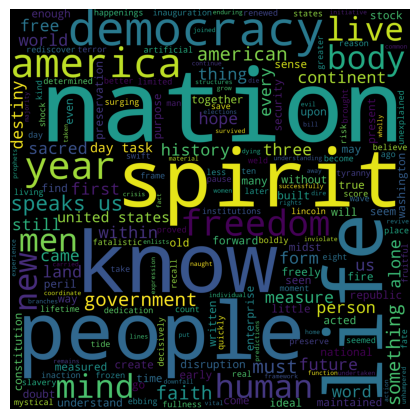

In [818]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(cloud1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for president Roosevelt'speech (after cleaning)!!")
plt.show()

In [819]:
cloud2=' '.join(all_words_clean2)

Word Cloud for president Kennedy'speech (after cleaning)!!


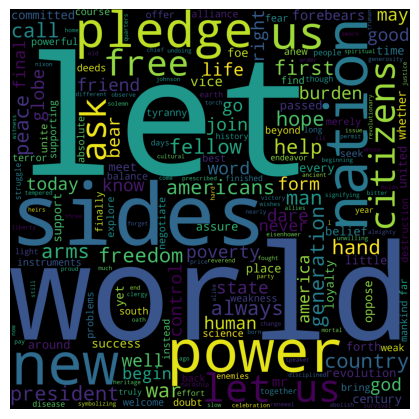

In [820]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(cloud2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for president Kennedy'speech (after cleaning)!!")
plt.show()

In [821]:
cloud3=' '.join(all_words_clean3)

Word Cloud for president Nixon'speech (after cleaning)!!


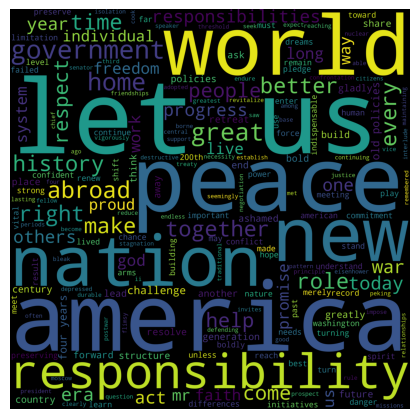

In [822]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(cloud3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for president Nixon'speech (after cleaning)!!")
plt.show()